<a href="https://colab.research.google.com/github/simonacarusooo/Statistical-Methods-for-Machine-Learning/blob/main/CNN_MuffinChihuahua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data importing and data preparation

In [1]:
import tensorflow as tf
from PIL import Image
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import shutil
import random

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1




---


In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive/', force_remount=True)
!unzip -q /content/gdrive/MyDrive/archive.zip

Mounted at /content/gdrive/


In [3]:
img_list = [
    os.path.join(dirname, filename)
    for dirname, _, filenames in os.walk(".")
    for filename in filenames
    if ".jpg" in filename and "MyDrive" not in dirname
]

In [4]:
chihuahua_images = [img for img in img_list if "chihuahua" in img]
muffin_images = [img for img in img_list if "muffin" in img]

cnt_chihuahua = len(chihuahua_images)
cnt_muffin = len(muffin_images)

print(cnt_chihuahua)
print(cnt_muffin)

3199
2718


In [5]:
labels = [img.split("/")[2] for img in img_list]
filepaths = [img for img in img_list]

In [6]:
df = pd.DataFrame({"file":filepaths, "label":labels})

In [7]:
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(df, test_size=0.2, random_state=100)
train, val = train_test_split(train_val, test_size=0.125, random_state=100)

print("Training set:", len(train))
print("Validation set:", len(val))
print("Test set:", len(test))


Training set: 4141
Validation set: 592
Test set: 1184


In [8]:
df

,file,label
0,./train/muffin/img_3_1074.jpg,muffin
1,./train/muffin/img_0_359.jpg,muffin
2,./train/muffin/img_3_271.jpg,muffin
3,./train/muffin/img_4_805.jpg,muffin
4,./train/muffin/img_2_202.jpg,muffin
...,...,...
5912,./test/chihuahua/img_0_618.jpg,chihuahua
5913,./test/chihuahua/img_4_129.jpg,chihuahua
5914,./test/chihuahua/img_2_810.jpg,chihuahua
5915,./test/chihuahua/img_2_655.jpg,chihuahua




---



In [9]:
norm = ImageDataGenerator(rescale=1. / 255)

batch_size = 16

train_gen = norm.flow_from_dataframe(
    dataframe=train,
    x_col="file",
    y_col="label",
    directory="/content",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="binary",
    color_mode="rgb",
    seed=100,
    shuffle = True
)

val_gen = norm.flow_from_dataframe(
    dataframe=val,
    x_col="file",
    y_col="label",
    directory="/content",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="binary",
    color_mode="rgb",
    seed=100,
    shuffle = True
)

Found 4141 validated image filenames belonging to 2 classes.
Found 592 validated image filenames belonging to 2 classes.


In [10]:
test_gen = norm.flow_from_dataframe(
            dataframe = test,
            directory = "/content",
            seed = 100,
            x_col = "file",
            y_col = "label",
            target_size = (224,224),
            class_mode="binary",
            color_mode = "rgb",
            shuffle=False)

Found 1184 validated image filenames belonging to 2 classes.


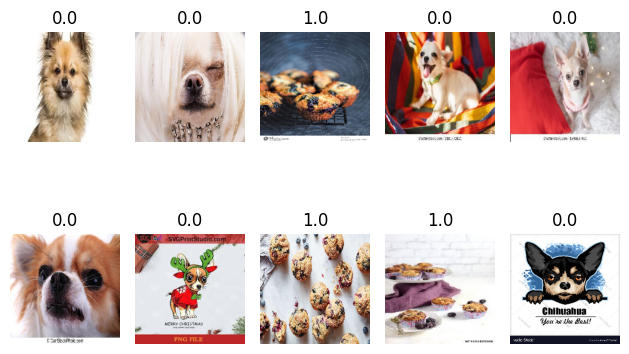

In [12]:
images, labels = train_gen.next()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
aug = ImageDataGenerator(rescale=1. / 255, rotation_range=10, width_shift_range=0.2, height_shift_range=0.3, shear_range=0.3, zoom_range=0.3,
    channel_shift_range=10., horizontal_flip=True)

train_gen_aug = aug.flow_from_dataframe(
    dataframe=train,
    x_col="file",
    y_col="label",
    directory="/content",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="binary",
    color_mode='rgb',
    seed=100,
    shuffle = True
)

val_gen_aug = aug.flow_from_dataframe(
    dataframe=val,
    x_col="file",
    y_col="label",
    directory="/content",
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="binary",
    color_mode='rgb',
    seed=100,
    shuffle = True
)

Found 4141 validated image filenames belonging to 2 classes.
Found 592 validated image filenames belonging to 2 classes.


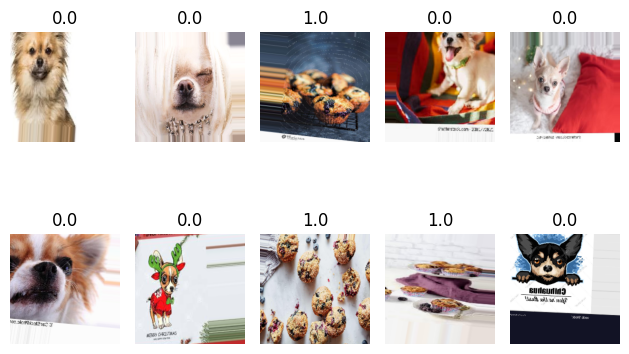

In [14]:
images, labels = train_gen_aug.next()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
stop_early = [keras.callbacks.EarlyStopping(monitor="val_loss", patience = 5,  start_from_epoch= 15)]

  # Model 1

In [ ]:
model1 = Sequential([

    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(units = 64, activation = 'relu'),

    Dense(units=1, activation='sigmoid')
])

In [ ]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 200704)            0         
                                                                 
 dense_14 (Dense)            (None, 64)               

In [ ]:
#https://deeplizard.com/learn/video/daovGOlMbT4
model1.compile(optimizer = "adam",
                   loss = "binary_crossentropy",
                   metrics = ["accuracy"])

In [ ]:
history1 = model1.fit(x=train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks = stop_early
)
metrics_df1 = pd.DataFrame(history1.history)

Epoch 1/50
259/259 [==============================] - 28s 105ms/step - loss: 0.6378 - accuracy: 0.7513 - val_loss: 0.3563 - val_accuracy: 0.8497
Epoch 2/50
259/259 [==============================] - 28s 107ms/step - loss: 0.3386 - accuracy: 0.8582 - val_loss: 0.3577 - val_accuracy: 0.8581
Epoch 3/50
259/259 [==============================] - 26s 101ms/step - loss: 0.2149 - accuracy: 0.9164 - val_loss: 0.4236 - val_accuracy: 0.8226
Epoch 4/50
259/259 [==============================] - 26s 99ms/step - loss: 0.1158 - accuracy: 0.9546 - val_loss: 0.3750 - val_accuracy: 0.8682
Epoch 5/50
259/259 [==============================] - 27s 105ms/step - loss: 0.0498 - accuracy: 0.9836 - val_loss: 0.5048 - val_accuracy: 0.8497
Epoch 6/50
259/259 [==============================] - 27s 104ms/step - loss: 0.0203 - accuracy: 0.9944 - val_loss: 0.4643 - val_accuracy: 0.8682
Epoch 7/50
259/259 [==============================] - 26s 99ms/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.5775 - val_accu

In [ ]:
metrics_df1

,loss,accuracy,val_loss,val_accuracy
0,0.637794,0.751268,0.356262,0.849662
1,0.338583,0.858247,0.357742,0.858108
2,0.214911,0.916445,0.423560,0.822635
3,0.115786,0.954600,0.374976,0.868243
4,0.049792,0.983579,0.504762,0.849662
5,0.020296,0.994446,0.464315,0.868243
6,0.006477,0.999034,0.577496,0.876689
7,0.005071,0.999034,0.620208,0.880068
8,0.001224,1.000000,0.667626,0.868243
9,0.000334,1.000000,0.683743,0.876689


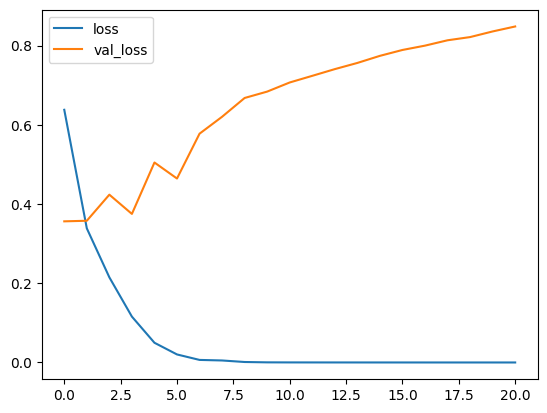

In [ ]:
metrics_df1[["loss","val_loss"]].plot();

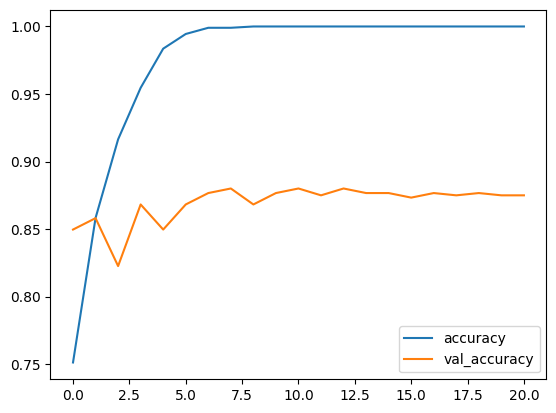

In [ ]:
metrics_df1[["accuracy","val_accuracy"]].plot();

#Model 2


In [ ]:
model2 = Sequential([

    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(units = 64, activation = 'relu'),

    Dense(units=1, activation='sigmoid')
])

In [ ]:
#https://deeplizard.com/learn/video/daovGOlMbT4
model2.compile(optimizer = "adam",
                   loss = "binary_crossentropy",
                   metrics = ["accuracy"])

In [ ]:
history2 = model2.fit(x=train_gen_aug,
    validation_data=val_gen_aug,
    epochs=50,
    callbacks = stop_early
)

metrics_df2 = pd.DataFrame(history2.history)

Epoch 1/50
259/259 [==============================] - 81s 308ms/step - loss: 0.6532 - accuracy: 0.7397 - val_loss: 0.3905 - val_accuracy: 0.8243
Epoch 2/50
259/259 [==============================] - 82s 318ms/step - loss: 0.4427 - accuracy: 0.8046 - val_loss: 0.4146 - val_accuracy: 0.8142
Epoch 3/50
259/259 [==============================] - 79s 303ms/step - loss: 0.3956 - accuracy: 0.8278 - val_loss: 0.3419 - val_accuracy: 0.8598
Epoch 4/50
259/259 [==============================] - 91s 351ms/step - loss: 0.3796 - accuracy: 0.8346 - val_loss: 0.3920 - val_accuracy: 0.8463
Epoch 5/50
259/259 [==============================] - 80s 309ms/step - loss: 0.3572 - accuracy: 0.8486 - val_loss: 0.3238 - val_accuracy: 0.8682
Epoch 6/50
259/259 [==============================] - 81s 311ms/step - loss: 0.3581 - accuracy: 0.8532 - val_loss: 0.3280 - val_accuracy: 0.8581
Epoch 7/50
259/259 [==============================] - 81s 312ms/step - loss: 0.3366 - accuracy: 0.8575 - val_loss: 0.3417 - val_ac

In [ ]:
metrics_df2

,loss,accuracy,val_loss,val_accuracy
0,0.653193,0.739676,0.390512,0.824324
1,0.442657,0.804637,0.414612,0.814189
2,0.395551,0.827819,0.341928,0.859797
3,0.379574,0.834581,0.392037,0.846284
4,0.357206,0.848587,0.323811,0.868243
5,0.358117,0.853176,0.328000,0.858108
6,0.336641,0.857522,0.341696,0.854730
7,0.314508,0.865974,0.298376,0.880068
8,0.314976,0.868148,0.339561,0.856419
9,0.309170,0.870321,0.272031,0.888514


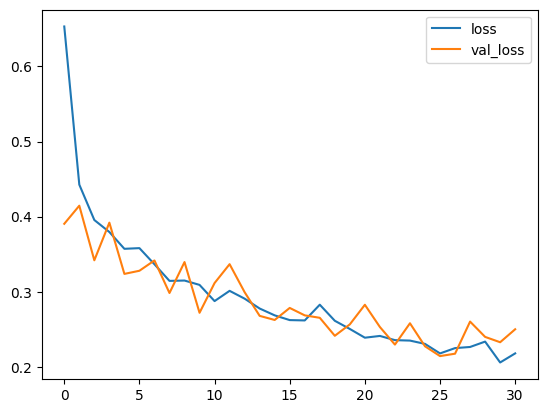

In [ ]:
metrics_df2[["loss","val_loss"]].plot();

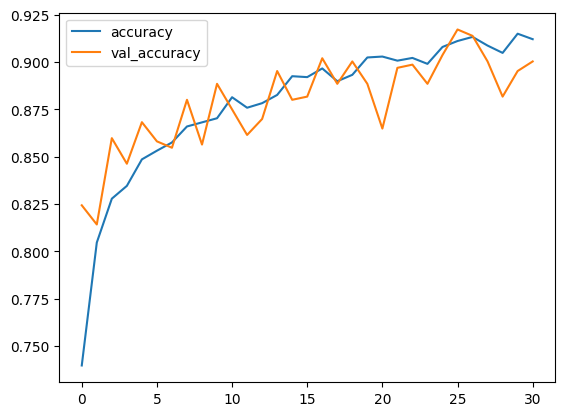

In [ ]:
metrics_df2[["accuracy","val_accuracy"]].plot();

#Model 3

In [ ]:
model3 = Sequential([

    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),

    Flatten(),
    Dense(units = 64, activation = 'relu'),
    Dropout(0.3),

    Dense(units=1, activation='sigmoid')
])

model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 56, 56, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 56, 56, 64)       

In [ ]:
model3.compile(optimizer = "adam",
                   loss = "binary_crossentropy",
                   metrics = ["accuracy"])

In [ ]:
history3 = model3.fit(x=train_gen_aug,
    validation_data=val_gen_aug,
    epochs=50,
    callbacks=stop_early
)

metrics_df3 = pd.DataFrame(history3.history)

Epoch 1/50
259/259 [==============================] - 81s 313ms/step - loss: 0.6364 - accuracy: 0.6399 - val_loss: 0.5021 - val_accuracy: 0.7855
Epoch 2/50
259/259 [==============================] - 84s 326ms/step - loss: 0.4936 - accuracy: 0.7827 - val_loss: 0.4626 - val_accuracy: 0.7855
Epoch 3/50
259/259 [==============================] - 83s 319ms/step - loss: 0.4388 - accuracy: 0.8008 - val_loss: 0.4445 - val_accuracy: 0.8007
Epoch 4/50
259/259 [==============================] - 85s 327ms/step - loss: 0.4139 - accuracy: 0.8227 - val_loss: 0.3910 - val_accuracy: 0.8294
Epoch 5/50
259/259 [==============================] - 89s 346ms/step - loss: 0.4104 - accuracy: 0.8300 - val_loss: 0.3799 - val_accuracy: 0.8429
Epoch 6/50
259/259 [==============================] - 93s 360ms/step - loss: 0.4022 - accuracy: 0.8295 - val_loss: 0.3907 - val_accuracy: 0.8311
Epoch 7/50
259/259 [==============================] - 92s 356ms/step - loss: 0.3719 - accuracy: 0.8457 - val_loss: 0.3994 - val_ac

In [ ]:
metrics_df3

,loss,accuracy,val_loss,val_accuracy
0,0.636446,0.639942,0.502128,0.785473
1,0.493577,0.782661,0.462617,0.785473
2,0.438776,0.800773,0.444493,0.800676
3,0.413935,0.822748,0.391017,0.829392
4,0.410371,0.829993,0.379889,0.842905
5,0.402208,0.829510,0.390689,0.831081
6,0.371881,0.845689,0.399447,0.824324
7,0.374272,0.844482,0.372982,0.837838
8,0.365348,0.848587,0.387963,0.837838
9,0.363079,0.848587,0.333438,0.856419


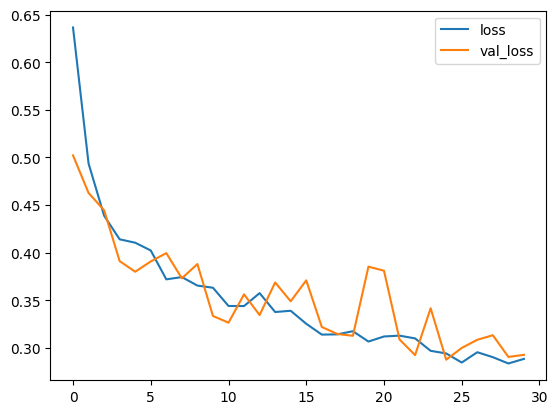

In [ ]:
metrics_df3[["loss","val_loss"]].plot();

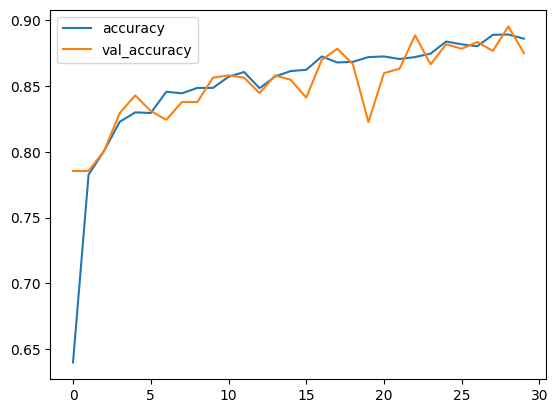

In [ ]:
metrics_df3[["accuracy","val_accuracy"]].plot();

#Model 4

In [ ]:
model4 = Sequential([

    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),


    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),


    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.25),


    Flatten(),
    Dense(units = 64, activation = 'relu'),
    Dropout(0.3),

    Dense(units=1, activation='sigmoid')
])

In [ ]:
model4.compile(optimizer = "adam",
                   loss = "binary_crossentropy",
                   metrics = ["accuracy"])

In [ ]:
history4 = model4.fit(x=train_gen_aug,
    validation_data=val_gen_aug,
    epochs=50,
    callbacks=stop_early
)

metrics_df4 = pd.DataFrame(history4.history)

Epoch 1/50
259/259 [==============================] - 86s 324ms/step - loss: 0.7908 - accuracy: 0.5429 - val_loss: 0.6833 - val_accuracy: 0.5490
Epoch 2/50
259/259 [==============================] - 84s 325ms/step - loss: 0.5576 - accuracy: 0.7310 - val_loss: 0.5096 - val_accuracy: 0.7787
Epoch 3/50
259/259 [==============================] - 83s 319ms/step - loss: 0.4624 - accuracy: 0.7928 - val_loss: 0.4791 - val_accuracy: 0.7720
Epoch 4/50
259/259 [==============================] - 85s 326ms/step - loss: 0.4200 - accuracy: 0.8252 - val_loss: 0.3917 - val_accuracy: 0.8193
Epoch 5/50
259/259 [==============================] - 87s 334ms/step - loss: 0.3883 - accuracy: 0.8324 - val_loss: 0.3451 - val_accuracy: 0.8666
Epoch 6/50
259/259 [==============================] - 85s 329ms/step - loss: 0.3657 - accuracy: 0.8454 - val_loss: 0.3263 - val_accuracy: 0.8598
Epoch 7/50
259/259 [==============================] - 85s 328ms/step - loss: 0.3322 - accuracy: 0.8684 - val_loss: 0.3111 - val_ac

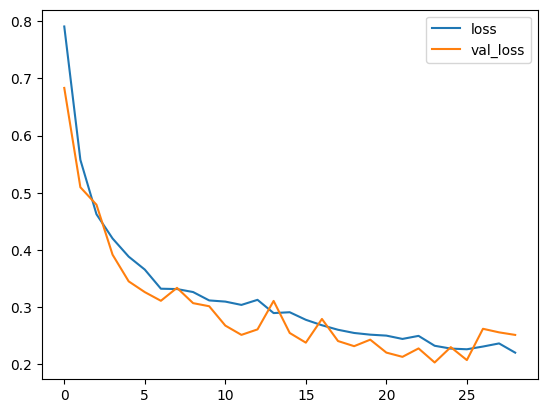

In [ ]:
metrics_df4[["loss","val_loss"]].plot();

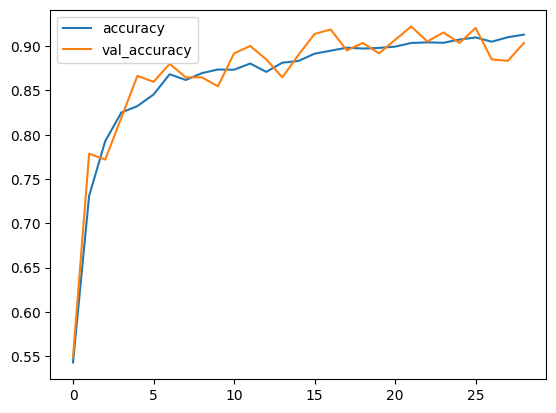

In [ ]:
metrics_df4[["accuracy","val_accuracy"]].plot();

#Hyperparameter tuning

In [13]:
!pip install -q -U keras-tuner
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.2 MB/s eta 0:00:00


In [14]:
def model_builder(hp):
    hidden_dropout = hp.Float("dropout_hidden_layer", min_value = 0.05, max_value = 0.3, step = 0.05)
    dense_dropout = hp.Float("dropout_flatten_layer", min_value = 0.2, max_value = 0.5, step = 0.1)

    model = keras.Sequential()
    model.add(keras.layers.Conv2D(filters=hp.Int("convolution_1_filters", min_value=16, max_value=64, step=16),
                                  kernel_size=(3, 3),
                                  input_shape=(224, 224, 3)))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hidden_dropout))


    model.add(keras.layers.Conv2D(filters=hp.Int("convolution_2_filters", min_value=32, max_value=128, step=32),
                                  kernel_size=(3, 3)))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hidden_dropout))



    model.add(keras.layers.Conv2D(filters=hp.Int("convolution_3_filters", min_value=64, max_value=256, step=64),
                                  kernel_size=(3, 3)))
    model.add(keras.layers.Activation("relu"))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hidden_dropout))



    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=hp.Int("num_units", min_value=32, max_value=256, step=32),
                                 activation="relu"))
    model.add(Dropout(dense_dropout))



    model.add(keras.layers.Dense(units=1, activation="sigmoid"))


    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return model

In [15]:
tuner = kt.BayesianOptimization(model_builder, objective = "val_accuracy", max_trials = 5,
                                directory = "./gdrive/MyDrive/MuffinChihuahua",
                                project_name = "cnn",
                                overwrite = False)

Reloading Tuner from ./gdrive/MyDrive/MuffinChihuahua/cnn/tuner0.json


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 6
dropout_hidden_layer (Float)
{'default': 0.05, 'conditions': [], 'min_value': 0.05, 'max_value': 0.3, 'step': 0.05, 'sampling': 'linear'}
dropout_flatten_layer (Float)
{'default': 0.2, 'conditions': [], 'min_value': 0.2, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
convolution_1_filters (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
convolution_2_filters (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
convolution_3_filters (Int)
{'default': None, 'conditions': [], 'min_value': 64, 'max_value': 256, 'step': 64, 'sampling': 'linear'}
num_units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}


In [ ]:
#Not run if you have already saved the tuned hyperparameters on Google Drive!!!
tuner.search(train_gen_aug, epochs = 50, validation_data = val_gen_aug,
             callbacks = stop_early)

Trial 5 Complete [00h 36m 39s]
val_accuracy: 0.9206081032752991

Best val_accuracy So Far: 0.9273648858070374
Total elapsed time: 03h 32m 48s


In [19]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [20]:
best_hyperparameters.values

{'dropout_hidden_layer': 0.1,
 'dropout_flatten_layer': 0.30000000000000004,
 'convolution_1_filters': 16,
 'convolution_2_filters': 64,
 'convolution_3_filters': 64,
 'num_units': 192}

In [21]:
hypermodel = tuner.hypermodel.build(best_hyperparameters)

In [22]:
history_best = hypermodel.fit(train_gen_aug,
                         epochs = 50,
                         validation_data = val_gen_aug,
                         callbacks=stop_early
)
metrics_df = pd.DataFrame(history_best.history)

Epoch 1/50
259/259 [==============================] - 96s 339ms/step - loss: 0.6235 - accuracy: 0.6861 - val_loss: 0.5129 - val_accuracy: 0.7720
Epoch 2/50
259/259 [==============================] - 116s 450ms/step - loss: 0.4788 - accuracy: 0.7836 - val_loss: 0.4200 - val_accuracy: 0.8176
Epoch 3/50
259/259 [==============================] - 91s 353ms/step - loss: 0.4427 - accuracy: 0.8083 - val_loss: 0.3750 - val_accuracy: 0.8463
Epoch 4/50
259/259 [==============================] - 100s 387ms/step - loss: 0.3958 - accuracy: 0.8288 - val_loss: 0.3614 - val_accuracy: 0.8480
Epoch 5/50
259/259 [==============================] - 84s 324ms/step - loss: 0.3624 - accuracy: 0.8421 - val_loss: 0.3447 - val_accuracy: 0.8547
Epoch 6/50
259/259 [==============================] - 86s 331ms/step - loss: 0.3522 - accuracy: 0.8522 - val_loss: 0.3260 - val_accuracy: 0.8682
Epoch 7/50
259/259 [==============================] - 87s 335ms/step - loss: 0.3283 - accuracy: 0.8575 - val_loss: 0.3688 - val_

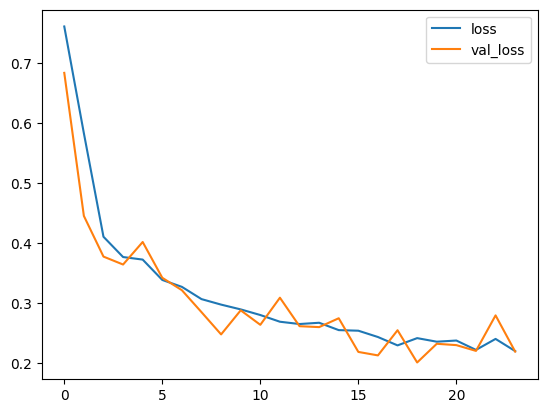

In [ ]:
metrics_df[["loss","val_loss"]].plot();

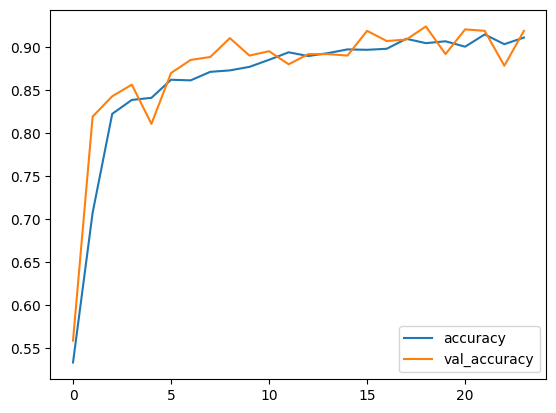

In [ ]:
metrics_df[["accuracy","val_accuracy"]].plot();

# Predictions on test set

In [31]:
pred = hypermodel.predict(test_gen)

37/37 [==============================] - 5s 144ms/step


In [32]:
pred

array([[0.39626923],
       [0.09789521],
       [0.08416287],
       ...,
       [0.49790242],
       [0.08770078],
       [0.99992394]], dtype=float32)

In [33]:
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

In [34]:
pred_r = [0 if val < 0.5 else 1 for val in pred]

In [44]:
from sklearn import metrics
report = metrics.classification_report(true_classes, pred_r, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

   chihuahua       0.90      0.98      0.94       621
      muffin       0.97      0.88      0.92       563

    accuracy                           0.93      1184
   macro avg       0.93      0.93      0.93      1184
weighted avg       0.93      0.93      0.93      1184



In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

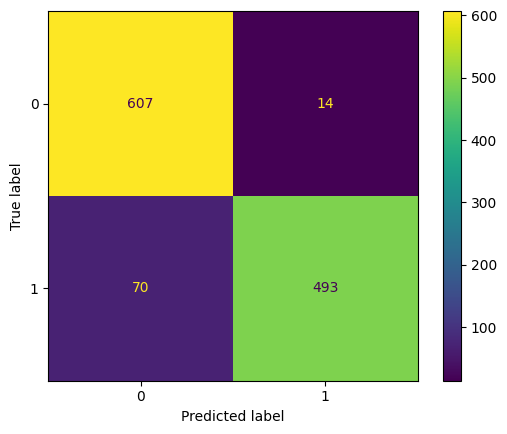

In [40]:
cm = confusion_matrix(true_classes, pred_r)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

In [30]:
hypermodel.evaluate(test_gen)

37/37 [==============================] - 10s 258ms/step - loss: 0.1933 - accuracy: 0.9291


[0.1932600438594818, 0.9290540814399719]

ROC AUC: 0.978008


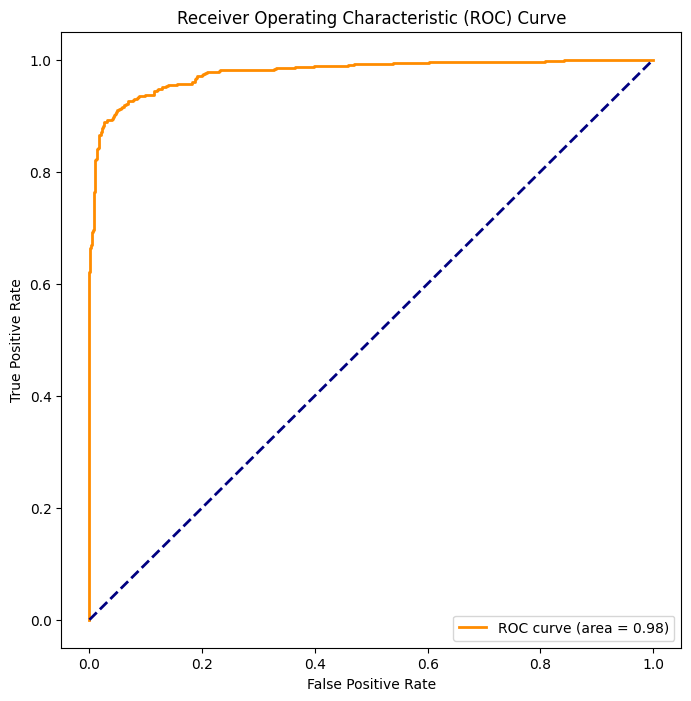

In [47]:
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = metrics.roc_curve(true_classes, pred)

auc = roc_auc_score(true_classes,pred)
print('ROC AUC: %f' % auc)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 5-fold Cross Validation

In [25]:
from sklearn.model_selection import KFold

Y = train[['label']]
kf = KFold(n_splits = 5, random_state = 100, shuffle = True)

In [26]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [30]:
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

fold_var = 1

for train_index, val_index in kf.split(df):
    training = df["file"][train_index]
    validation = df["file"][val_index]

    train_df = df.loc[df["file"].isin(training)]
    val_df = df.loc[df["file"].isin(validation)]

    train_data_generator = aug.flow_from_dataframe(train_df, directory="/content",
                                                    x_col="file", y_col="label",
                                                    class_mode="binary", shuffle=True, seed=100,
                                                    target_size=(224, 224))
    valid_data_generator = aug.flow_from_dataframe(val_df, directory="/content",
                                                    x_col="file", y_col="label",
                                                    class_mode="binary", shuffle=True, seed=100,
                                                    target_size=(224, 224))

    best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
    model = tuner.hypermodel.build(best_hyperparameters)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    # FIT THE MODEL
    history = model.fit(train_data_generator,
                        epochs=50,
                        callbacks=stop_early,
                        validation_data=valid_data_generator)

    # SAVE BEST MODEL
    model_path = "/content/MuffinChihuahua/model_" + str(fold_var) + ".h5"
    model.save(model_path)

    # LOAD BEST MODEL to evaluate the performance of the model
    if os.path.exists(model_path):
        model.load_weights(model_path)
    else:
        print("File doesn't exist")

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names, results))

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_LOSS.append(results['loss'])

    tf.keras.backend.clear_session()

    fold_var += 1


Found 4733 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.
Epoch 1/50
148/148 [==============================] - 106s 705ms/step - loss: 0.7897 - accuracy: 0.5521 - val_loss: 0.6875 - val_accuracy: 0.6140
Epoch 2/50
148/148 [==============================] - 102s 692ms/step - loss: 0.5841 - accuracy: 0.6983 - val_loss: 0.5598 - val_accuracy: 0.7365
Epoch 3/50
148/148 [==============================] - 104s 705ms/step - loss: 0.4612 - accuracy: 0.7970 - val_loss: 0.4401 - val_accuracy: 0.8209
Epoch 4/50
148/148 [==============================] - 104s 701ms/step - loss: 0.3973 - accuracy: 0.8291 - val_loss: 0.3671 - val_accuracy: 0.8539
Epoch 5/50
148/148 [==============================] - 103s 694ms/step - loss: 0.3684 - accuracy: 0.8449 - val_loss: 0.4027 - val_accuracy: 0.8176
Epoch 6/50
148/148 [==============================] - 102s 691ms/step - loss: 0.3548 - accuracy: 0.8460 - val_loss: 0.3306 - val_accuracy: 0.8606
Ep

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 [==============================] - 23s 618ms/step - loss: 0.3101 - accuracy: 0.8843
Found 4733 validated image filenames belonging to 2 classes.
Found 1184 validated image filenames belonging to 2 classes.
Epoch 1/50
148/148 [==============================] - 103s 684ms/step - loss: 0.6854 - accuracy: 0.6391 - val_loss: 0.4858 - val_accuracy: 0.7796
Epoch 2/50
148/148 [==============================] - 102s 692ms/step - loss: 0.4775 - accuracy: 0.7860 - val_loss: 0.4636 - val_accuracy: 0.8159
Epoch 3/50
148/148 [==============================] - 99s 669ms/step - loss: 0.4234 - accuracy: 0.8141 - val_loss: 0.4323 - val_accuracy: 0.8091
Epoch 4/50
148/148 [==============================] - 118s 802ms/step - loss: 0.3912 - accuracy: 0.8348 - val_loss: 0.4014 - val_accuracy: 0.8294
Epoch 5/50
148/148 [==============================] - 100s 676ms/step - loss: 0.3477 - accuracy: 0.8561 - val_loss: 0.3062 - val_accuracy: 0.8767
Epoch 6/50
148/148 [==============================] - 97s 6

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 [==============================] - 19s 506ms/step - loss: 0.1950 - accuracy: 0.9172
Found 4734 validated image filenames belonging to 2 classes.
Found 1183 validated image filenames belonging to 2 classes.
Epoch 1/50
148/148 [==============================] - 103s 687ms/step - loss: 0.7503 - accuracy: 0.5452 - val_loss: 0.6564 - val_accuracy: 0.5850
Epoch 2/50
148/148 [==============================] - 100s 679ms/step - loss: 0.6673 - accuracy: 0.5528 - val_loss: 0.6499 - val_accuracy: 0.5841
Epoch 3/50
148/148 [==============================] - 97s 653ms/step - loss: 0.6521 - accuracy: 0.5929 - val_loss: 0.6277 - val_accuracy: 0.6154
Epoch 4/50
148/148 [==============================] - 99s 671ms/step - loss: 0.5652 - accuracy: 0.7024 - val_loss: 0.4533 - val_accuracy: 0.8073
Epoch 5/50
148/148 [==============================] - 101s 683ms/step - loss: 0.4656 - accuracy: 0.7981 - val_loss: 0.3713 - val_accuracy: 0.8453
Epoch 6/50
148/148 [==============================] - 100s 6

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 [==============================] - 20s 549ms/step - loss: 0.2000 - accuracy: 0.9180
Found 4734 validated image filenames belonging to 2 classes.
Found 1183 validated image filenames belonging to 2 classes.
Epoch 1/50
148/148 [==============================] - 105s 699ms/step - loss: 0.8585 - accuracy: 0.5403 - val_loss: 0.6860 - val_accuracy: 0.5630
Epoch 2/50
148/148 [==============================] - 101s 685ms/step - loss: 0.6864 - accuracy: 0.5469 - val_loss: 0.6676 - val_accuracy: 0.6247
Epoch 3/50
148/148 [==============================] - 103s 698ms/step - loss: 0.6157 - accuracy: 0.6736 - val_loss: 0.5478 - val_accuracy: 0.7887
Epoch 4/50
148/148 [==============================] - 104s 698ms/step - loss: 0.4649 - accuracy: 0.7970 - val_loss: 0.5061 - val_accuracy: 0.7625
Epoch 5/50
148/148 [==============================] - 101s 685ms/step - loss: 0.4021 - accuracy: 0.8268 - val_loss: 0.3837 - val_accuracy: 0.8394
Epoch 6/50
148/148 [==============================] - 105s

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 [==============================] - 20s 543ms/step - loss: 0.1808 - accuracy: 0.9290
Found 4734 validated image filenames belonging to 2 classes.
Found 1183 validated image filenames belonging to 2 classes.
Epoch 1/50
148/148 [==============================] - 105s 697ms/step - loss: 0.6143 - accuracy: 0.6834 - val_loss: 0.4655 - val_accuracy: 0.7895
Epoch 2/50
148/148 [==============================] - 101s 684ms/step - loss: 0.4670 - accuracy: 0.7924 - val_loss: 0.4409 - val_accuracy: 0.8039
Epoch 3/50
148/148 [==============================] - 100s 679ms/step - loss: 0.4274 - accuracy: 0.8175 - val_loss: 0.4340 - val_accuracy: 0.8047
Epoch 4/50
148/148 [==============================] - 100s 676ms/step - loss: 0.3748 - accuracy: 0.8431 - val_loss: 0.3146 - val_accuracy: 0.8605
Epoch 5/50
148/148 [==============================] - 99s 669ms/step - loss: 0.3587 - accuracy: 0.8496 - val_loss: 0.3099 - val_accuracy: 0.8774
Epoch 6/50
148/148 [==============================] - 101s 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 [==============================] - 18s 493ms/step - loss: 0.2167 - accuracy: 0.9146


In [31]:
VALIDATION_ACCURACY

[0.8842905163764954,
 0.9172297120094299,
 0.9180050492286682,
 0.9289940595626831,
 0.9146238565444946]

In [32]:
VALIDATION_LOSS

[0.3101227581501007,
 0.19499793648719788,
 0.1999981850385666,
 0.18084187805652618,
 0.21666742861270905]

In [33]:
np.mean(VALIDATION_ACCURACY)

0.9126286387443543

In [34]:
np.mean(VALIDATION_LOSS)

0.22052563726902008

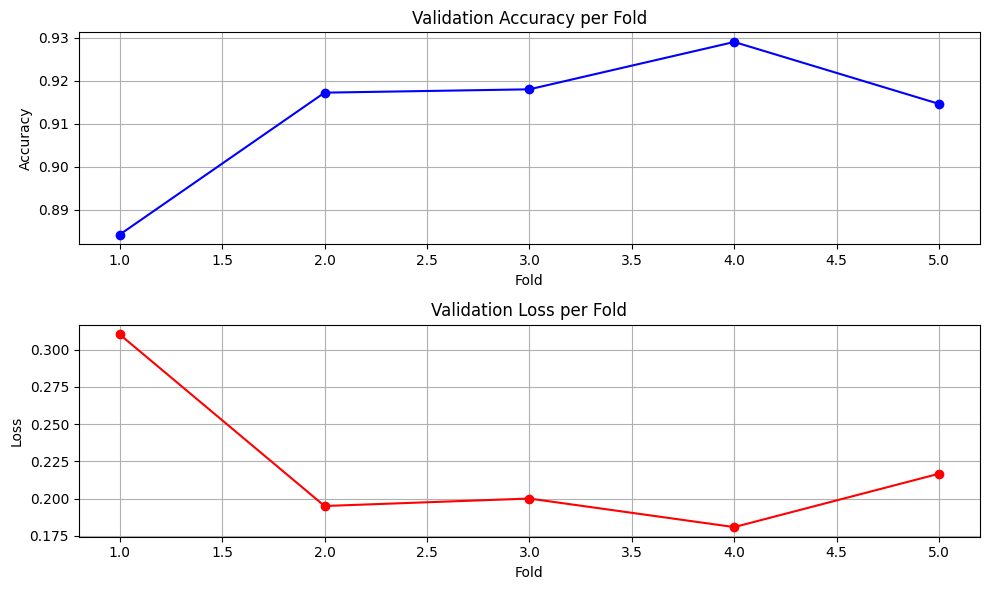

In [39]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(range(1, len(VALIDATION_ACCURACY) + 1), VALIDATION_ACCURACY, marker='o', linestyle='-', color='b')
plt.title('Validation Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(range(1, len(VALIDATION_LOSS) + 1), VALIDATION_LOSS, marker='o', linestyle='-', color='r')
plt.title('Validation Loss per Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()
